# Homework #1

- The deadline for on time submission is November 17, 2024. The maximum grade in case of
late submission is 3 points, and the deadline for late submission is 5 days before the oral
exam. The solutions have to be uploaded on the course website under the name Homework1.
- The exercises may be solved by using numerical codes or by hand. You may implement
your codes in any language, but the teacher assistant can only guarantee you support with
MATLAB and Python. Your code should be written in a quite general manner, i.e., if a
question is slightly modified, it should only require slight modifications in your code as well.
Upload a PDF lab-report together with your code.
- The PDF should read like a standard lab-report, including a description of what you are
doing and proper presentation of results (including readable figures with axis labels, if any).
Writing the report in Latex is strongly encouraged. Clarity of the presentation (especially
if the report is hand-written) and ability to synthesize are part of the evaluation of the
homework.
- Comment your code well. Clarity is more important than efficiency.
- Collaboration such as exchange of ideas among students is encouraged. You can work in
group of up to 5 students and write a unique PDF report. However, every student has to
submit her/his copy of the final report and code, and specify whom she/he has collaborated
with and on what particular part of the work

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1

Consider the network in Figure 1 with link capacities
$$c1 = c3 = c5 = 3,\space c6 = c7 = 1, c2 = c4 = 2.$$

**(a)** Compute the capacity of all the cuts and find the minimum capacity to be removed for no
feasible flow from $o$ to $d$ to exist.

In [2]:
# Define a directed graph
DG1 = nx.DiGraph()

# Add the nodes
nodes = ['o', 'a', 'b', 'c', 'd']
DG1.add_nodes_from(nodes)

In [3]:
# Add the edges with capacities
edges = {
    ('o', 'a'): 3,  # c1
    ('a', 'd'): 2,  # c2
    ('o', 'b'): 3,  # c3
    ('b', 'd'): 2,  # c4
    ('b', 'c'): 3,  # c5
    ('c', 'd'): 1,  # c6
    ('a', 'b'): 1   # c7
}

for edge, capacity in edges.items():
    DG1.add_edge(edge[0], edge[1], capacity=capacity)

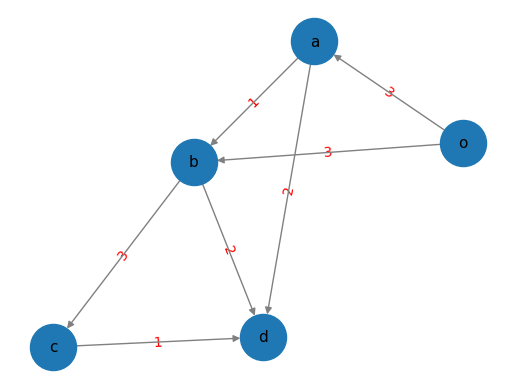

In [4]:
# Draw the network
pos = nx.kamada_kawai_layout(DG1)

nx.draw_networkx_edge_labels(DG1,pos,
    edge_labels={
        ('o','a'):edges[('o','a')],
        ('a','d'):edges[('a','d')],
        ('o','b'):edges[('o','b')],
        ('b','d'):edges[('b','d')],
        ('b','c'):edges[('b','c')],
        ('c','d'):edges[('c','d')],
        ('a','b'):edges[('a','b')]},
    font_color='red',
    font_size=10)

nx.draw(DG1, pos, with_labels=True, node_size=1100, font_size=11, edge_color='gray')

To compute the capacity of all cuts in the network, we first define the possible cuts and then calculate the cut capacity for each one.

**Network Cuts**
- $U=\{o,a,b,c\},U_C=\{d\}$
- $U=\{o,a,b\},U_C=\{c,d\}$
- $U=\{o,a,c\},U_C=\{b,d\}$
- $U=\{o,b,c\},U_C=\{a,d\}$
- $U=\{o,a\},U_C=\{b,c,d\}$
- $U=\{o,b\},U_C=\{a,c,d\}$
- $U=\{o,c\},U_C=\{a,b,d\}$
- $U=\{o\},U_C=\{a,b,c,d\}$

**Cut capacity** 

the capacity of a cut $\{U,U^C\}$ is
$$
C_{U} = \sum_{i \in U}\sum_{j \in U^C} c(i,j)
$$

Calculating the capacity for each cut:
- $U=\{o,a,b,c\},U_C=\{d\}$ -> $C_U = 5$ 
- $U=\{o,a,b\},U_C=\{c,d\}$ -> $C_U = 7$
- $U=\{o,a,c\},U_C=\{b,d\}$ -> $C_U = 7$
- $U=\{o,b,c\},U_C=\{a,d\}$ -> $C_U = 6$
- $U=\{o,a\},U_C=\{b,c,d\}$ -> $C_U = 6$
- $U=\{o,b\},U_C=\{a,c,d\}$ -> $C_U = 8$
- $U=\{o,c\},U_C=\{a,b,d\}$ -> $C_U = 7$
- $U=\{o\},U_C=\{a,b,c,d\}$ -> $C_U = 6$

From our computations, the minimum cut capacity is $5$, corresponding to the cut $\{\{o,a,b,c\},\{d\}\}$. According to the Max-Flow Min-Cut Theorem, this minimum cut capacity is equal to the maximum flow that can be sent from $o$ to $d$.


We can see the same result by using the `networkx.algorithms.flow.minimum_cut` function from the NetworkX library.

In [5]:
from networkx.algorithms.flow import minimum_cut

# Minimal cut capacity
minimum_cut(DG1, 'o','d')

(5, ({'a', 'b', 'c', 'o'}, {'d'}))

To make the network infeasible for any flow from  $o$  to  $d$ , we need to remove the capacity of the minimum cut. This cut has a capacity of  $5$ , so by removing or reducing the capacity of edges in this minimum cut to zero, we effectively block all possible paths from  $o$  to  $d$ .

**(b)**  You are given $x \gt 0$ extra units of capacity $(x \in Z)$. How should you distribute them in order
to maximize the throughput that can be sent from o to d? Plot the maximum throughput
from $o$ to $d$ as a function of $x \geq 0$.

In [6]:
from networkx.algorithms.flow import maximum_flow
import random
 
# Function to distribute extra capacity based on saturated edges in the minimum cut
def add_capacity_to_min_cut_edges(G):

    # Calculate the minimum cut separating 'o' from 'd'
    _, (U, Uc) = minimum_cut(G,'o','d')
    
    # Identify edges in the minimum cut
    min_cut_edges = [(u, v) for u in U for v in Uc if G.has_edge(u, v)]
    
    # Collect edges with capacity data
    capacity_edges = [(u, v, G[u][v]['capacity']) for u, v in min_cut_edges]
        
    # Sort edges by capacity in ascending order
    capacity_edges_sorted = sorted(capacity_edges, key=lambda edge: edge[2])
    
    # Find edges with the minimum capacity
    min_capacity = capacity_edges_sorted[0][2]
    min_capacity_edges = [edge for edge in capacity_edges_sorted if edge[2] == min_capacity]
    
    # Randomly select an edge among those with the minimum capacity
    selected_edge = random.choice(min_capacity_edges)
    u, v, _ = selected_edge
    
    # Increase the capacity of the selected edge by 1
    G[u][v]['capacity'] += 1
    
    # Store the selected edge and its new capacity in the dictionary
    if (u, v) in selected_edges:
        selected_edges[(u, v)] += 1  # Increment if exists
    else:
        selected_edges[(u, v)] = 1  # Initialize if not exists

    return G

# Initialize a dictionary to track selected edges and their capacities
selected_edges = {}

# List of extra capacity values to add (from 0 to 10)
extra_capacity_values = list(range(0, 21))
max_flow_values = [maximum_flow(DG1, 'o', 'd')[0]]  # Initial max flow value
temp_G = DG1.copy()

# Incrementally add capacity and calculate max flow for each added capacity unit
for _ in range(len(extra_capacity_values) - 1):
    temp_G = add_capacity_to_min_cut_edges(temp_G) 
    max_flow, _ = maximum_flow(temp_G, 'o', 'd')
    max_flow_values.append(max_flow)
    
# Print a summary of how to optimally increase edge capacities to maximize throughput
print(f'Given x={len(extra_capacity_values)-1}, to optimally distribute the additional units of capacity and maximize throughput, we should:\n')
for edge, capacity in selected_edges.items():
    print(f'Increase the capacity of edge {edge} by {capacity} units.')

Given x=20, to optimally distribute the additional units of capacity and maximize throughput, we should:

Increase the capacity of edge ('c', 'd') by 3 units.
Increase the capacity of edge ('a', 'd') by 3 units.
Increase the capacity of edge ('o', 'b') by 4 units.
Increase the capacity of edge ('o', 'a') by 4 units.
Increase the capacity of edge ('b', 'd') by 3 units.
Increase the capacity of edge ('a', 'b') by 2 units.
Increase the capacity of edge ('b', 'c') by 1 units.


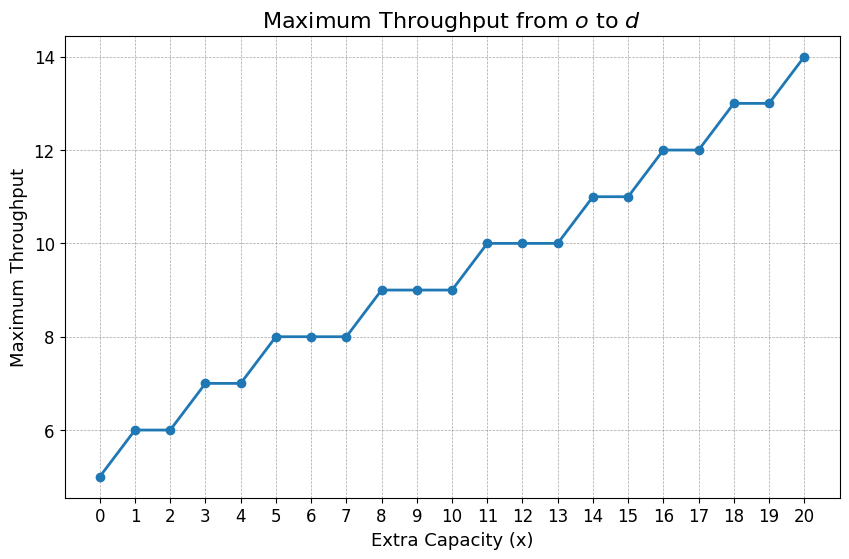

In [7]:
# Plot the maximum throughput as a function of x
plt.figure(figsize=(10, 6))
plt.plot(extra_capacity_values, max_flow_values, marker='o', linestyle='-', linewidth=2)
plt.title('Maximum Throughput from $o$ to $d$', fontsize=16)
plt.xlabel('Extra Capacity (x)', fontsize=13)
plt.ylabel('Maximum Throughput', fontsize=13)

plt.xticks(extra_capacity_values, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

**(c)**  You are given the possibility of adding to the network a directed link $e8$ with capacity $c8 = 1$
and $x \gt 0$ extra units of capacity $(x \in Z)$. Where should you add the link and how should
you distribute the additional capacity in order to maximize the throughput that can be sent
from $o$ to $d$? Plot the maximum throughput from $o$ to $d$ as a function of $x \geq 0$

In [8]:
import networkx as nx

# Function to add edge e8 in all possible configurations and calculate the minimum cut
def evaluate_minimum_cut_for_all_configurations(graph, new_edge_capacity=1):
    nodes = list(graph.nodes)
    results = {}
    
    # Iterate over all possible pairs of nodes to add edge e8
    for u in nodes:
        for v in nodes:
            # Only add the edge if it doesn't already exist and avoids loops
            if u != v and not graph.has_edge(u, v):
                # Create a copy of the graph for each new e8 configuration
                G_temp = graph.copy()
                
                # Avoid adding an edge that has as source d and target o
                if u != 'd' and v != 'o':
                    G_temp.add_edge(u, v, capacity=new_edge_capacity)
                
                    # Calculate the minimum cut between 'o' and 'd' with the current configuration of e8
                    max_flow, (U, Uc) = nx.minimum_cut(G_temp, 'o', 'd')
                    
                    # Store the result with details on the cut value and reachable/unreachable sets
                    results[(u, v)] = {
                        'max_flow': max_flow,
                        'U': U,
                        'Uc': Uc
                    }
                    # Remove the edge to reset the graph for the next configuration
                    G_temp.remove_edge(u, v)
    return results

# Run the function and print the results
all_minimum_cuts = evaluate_minimum_cut_for_all_configurations(DG1)

# Find the optimal edge configuration with the maximum flow
optimal_edge_configuration = max(all_minimum_cuts, key=lambda edge: all_minimum_cuts[edge]['max_flow'])
optimal_result = all_minimum_cuts[optimal_edge_configuration]

# Output results for each configuration of e8
for edge, result in all_minimum_cuts.items():
    print(f'Adding edge {edge} with capacity 1:')
    print(f'  Minimum cut value: {result["max_flow"]}')
    print(f'  U: {result["U"]}')
    print(f'  Uc: {result["Uc"]}\n')

# Display the optimal configuration for maximum throughput
print("Optimal configuration for edge e8:")
print(f'Add edge {optimal_edge_configuration} with capacity 1 to maximize flow.')
print(f'  Minimum cut value: {optimal_result["max_flow"]}')
print(f'  U (reachable set): {optimal_result["U"]}')
print(f'  Uc (unreachable set): {optimal_result["Uc"]}')

Adding edge ('o', 'c') with capacity 1:
  Minimum cut value: 5
  U: {'o', 'a', 'b', 'c'}
  Uc: {'d'}

Adding edge ('o', 'd') with capacity 1:
  Minimum cut value: 6
  U: {'o', 'a', 'b', 'c'}
  Uc: {'d'}

Adding edge ('a', 'c') with capacity 1:
  Minimum cut value: 5
  U: {'o', 'a', 'b', 'c'}
  Uc: {'d'}

Adding edge ('b', 'a') with capacity 1:
  Minimum cut value: 5
  U: {'o', 'a', 'b', 'c'}
  Uc: {'d'}

Adding edge ('c', 'a') with capacity 1:
  Minimum cut value: 5
  U: {'o', 'a', 'b', 'c'}
  Uc: {'d'}

Adding edge ('c', 'b') with capacity 1:
  Minimum cut value: 5
  U: {'o', 'a', 'b', 'c'}
  Uc: {'d'}

Optimal configuration for edge e8:
Add edge ('o', 'd') with capacity 1 to maximize flow.
  Minimum cut value: 6
  U (reachable set): {'o', 'a', 'b', 'c'}
  Uc (unreachable set): {'d'}


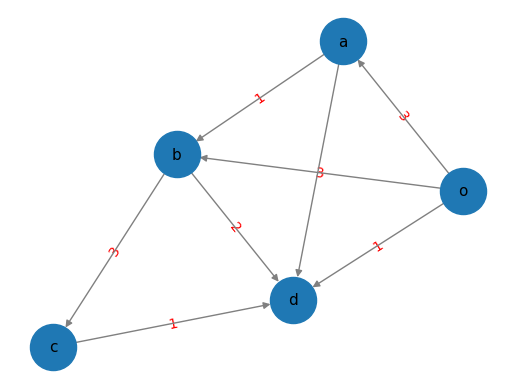

In [9]:
# Add the new edge e8 with capacity 1
DG2 = DG1.copy()
DG2.add_edge('o', 'd', capacity=1)

edges[('o', 'd')] = 1
pos = nx.kamada_kawai_layout(DG2)

nx.draw_networkx_edge_labels(DG2,pos,
    edge_labels={
        ('o','a'):edges[('o','a')],
        ('a','d'):edges[('a','d')],
        ('o','b'):edges[('o','b')],
        ('b','d'):edges[('b','d')],
        ('b','c'):edges[('b','c')],
        ('c','d'):edges[('c','d')],
        ('a','b'):edges[('a','b')],
        ('o', 'd'):edges[('o', 'd')]},
    font_color='red',
    font_size=10)

# Draw the network
nx.draw(DG2, pos, with_labels=True, node_size=1100, font_size=11, edge_color='gray')

In [10]:
# Initialize a dictionary to track selected edges and their capacities
selected_edges = {}

# List of extra capacity values to add (from 0 to 10)
extra_capacity_values = list(range(0, 21))
max_flow_values = [maximum_flow(DG2, 'o', 'd')[0]]  # Initial max flow value
temp_G = DG2.copy()

# Incrementally add capacity and calculate max flow for each added capacity unit
for _ in range(len(extra_capacity_values) - 1):
    temp_G = add_capacity_to_min_cut_edges(temp_G) 
    max_flow, _ = maximum_flow(temp_G, 'o', 'd')
    max_flow_values.append(max_flow)
    
# Print a summary of how to optimally increase edge capacities to maximize throughput
print(f'Given x={len(extra_capacity_values)-1}, to optimally distribute the additional units of capacity and maximize throughput \nfollowing the integration of the newly added edge  e8, we should:\n')
for edge, capacity in selected_edges.items():
    print(f'Increase the capacity of edge {edge} by {capacity} units.')

Given x=20, to optimally distribute the additional units of capacity and maximize throughput 
following the integration of the newly added edge  e8, we should:

Increase the capacity of edge ('c', 'd') by 4 units.
Increase the capacity of edge ('o', 'd') by 4 units.
Increase the capacity of edge ('a', 'd') by 2 units.
Increase the capacity of edge ('o', 'b') by 3 units.
Increase the capacity of edge ('o', 'a') by 3 units.
Increase the capacity of edge ('b', 'd') by 2 units.
Increase the capacity of edge ('a', 'b') by 1 units.
Increase the capacity of edge ('b', 'c') by 1 units.


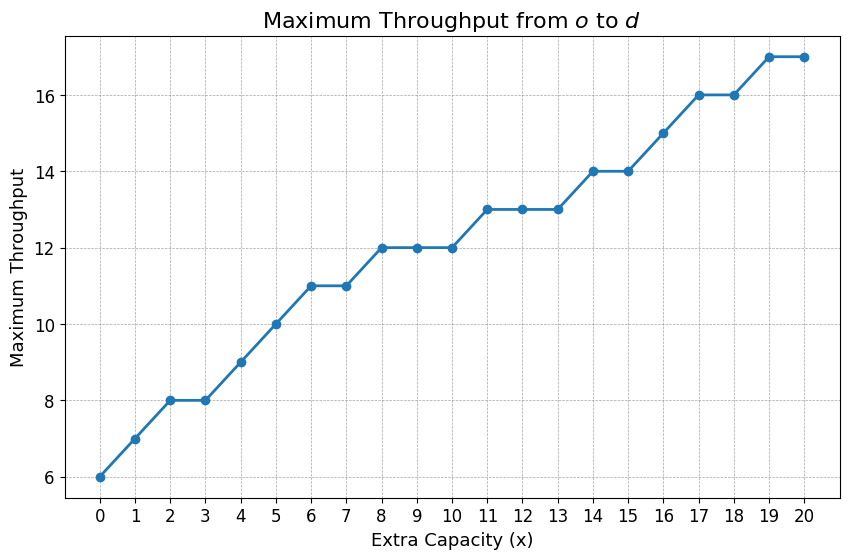

In [11]:
# Plot the maximum throughput as a function of x
plt.figure(figsize=(10, 6))
plt.plot(extra_capacity_values, max_flow_values, marker='o', linestyle='-', linewidth=2)
plt.title('Maximum Throughput from $o$ to $d$', fontsize=16)
plt.xlabel('Extra Capacity (x)', fontsize=13)
plt.ylabel('Maximum Throughput', fontsize=13)

plt.xticks(extra_capacity_values, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

## Exercise 2

There are a set of people ${a1,a2,a3,a4}$ and a set of foods ${b1,b2,b3,b4}$. Each person
is interested in a subset of foods, specifically
$$a1 →{b1,b2}, a2 →{b2,b3}, a3 →{b1,b4}, a4 →{b1,b2,b4}.$$
**(a)** Exploit max-flow problems to find a perfect matching (if any).

In [12]:
# Define the list of people and foods
people = ['a1', 'a2', 'a3', 'a4']
foods = ['b1', 'b2', 'b3', 'b4']

# Define each person's food preferences as a dictionary
preferences = {
    'a1': ['b1', 'b2'],
    'a2': ['b2', 'b3'],
    'a3': ['b1', 'b4'],
    'a4': ['b1', 'b2', 'b4']
}

In [13]:
DG3 = nx.DiGraph()

# Connect each person to their preferred foods with an edge of capacity 1
for person, food_list in preferences.items():
    for food in food_list:
        DG3.add_edge(person, food, capacity=1)

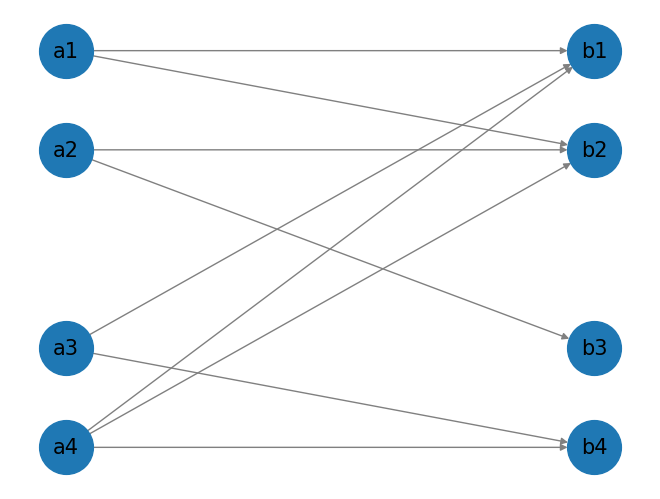

In [14]:
# Define positions for nodes to improve visualization
pos = {
    'a1': [-1, 2],  # person a1
    'a2': [-1, 1], # person a2
    'a3': [-1, -1],  # person a3
    'a4': [-1, -2],  # person a4
    'b1': [1, 2],   # food b1
    'b2': [1, 1],  # food b2
    'b3': [1, -1],  # food b3
    'b4': [1, -2],   # food b4
}

'''nx.draw_networkx_edge_labels(DG3,pos,
    edge_labels={
        ('a1','b1'):1,
        ('a1','b2'):1,
        ('a2','b2'):1,
        ('a2','b3'):1,
        ('a3','b1'):1,
        ('a3','b4'):1,
        ('a4','b1'):1,
        ('a4','b2'):1,
        ('a4','b4'):1},
    font_color='red',
    font_size=13)'''


# Draw the network
nx.draw(DG3, pos, with_labels=True, node_size=1500, font_size=15, edge_color='gray')

In [15]:
DG4 = DG3.copy()

# Add a source node ('o') and a sink node ('d')
DG4.add_node('o')
DG4.add_node('d')

# Connect source to each person with capacity 1
for person in people:
    DG4.add_edge('o', person, capacity=1)

# Connect each food to sink with capacity 1
for food in foods:
    DG4.add_edge(food, 'd', capacity=1)

In [16]:
# Ensuring that each existing edge has a capacity of 1
for edge in DG4.edges:
    DG4.add_edge(u_of_edge=edge[0],v_of_edge=edge[1], capacity=1)

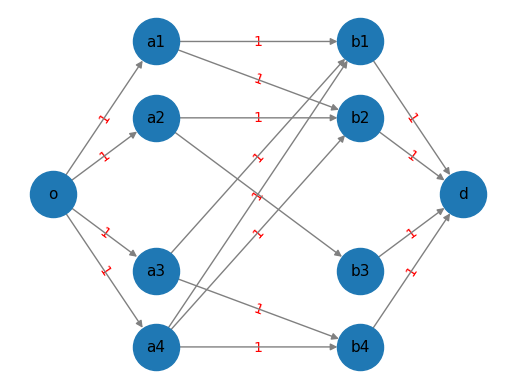

In [17]:
# Update positions to include source ('o') and sink ('d')
pos = {
    'o': [-2, 0],    
    'd': [2, 0],    
    'a1': [-1, 2],  
    'a2': [-1, 1], 
    'a3': [-1, -1],  
    'a4': [-1, -2],  
    'b1': [1, 2],      
    'b2': [1, 1],     
    'b3': [1, -1],     
    'b4': [1, -2],   
}

nx.draw_networkx_edge_labels(DG4,pos,
    edge_labels={
        ('o', 'a1'):1,
        ('o', 'a2'):1,
        ('o', 'a3'):1,
        ('o', 'a4'):1,
        ('a1','b1'):1,
        ('a1','b2'):1,
        ('a2','b2'):1,
        ('a2','b3'):1,
        ('a3','b1'):1,
        ('a3','b4'):1,
        ('a4','b1'):1,
        ('a4','b2'):1,
        ('a4','b4'):1,
        ('b1', 'd'):1,
        ('b2', 'd'):1,
        ('b3', 'd'):1,
        ('b4', 'd'):1},
    font_color='red',
    font_size=10)

# Draw the network
nx.draw(DG4, pos, with_labels=True, node_size=1100, font_size=11, edge_color='gray')

In [18]:
# Compute the maximum flow from source 'o' to sink 'd'
flow_value, flow_dict = nx.maximum_flow(DG4, 'o', 'd')

# Check if a perfect matching exists (i.e., if the flow equals the number of people)
perfect_matching_exists = flow_value == len(people)

flow_value, flow_dict, perfect_matching_exists

(4,
 {'a1': {'b1': 0, 'b2': 1},
  'b1': {'d': 1},
  'b2': {'d': 1},
  'a2': {'b2': 0, 'b3': 1},
  'b3': {'d': 1},
  'a3': {'b1': 1, 'b4': 0},
  'b4': {'d': 1},
  'a4': {'b1': 0, 'b2': 0, 'b4': 1},
  'o': {'a1': 1, 'a2': 1, 'a3': 1, 'a4': 1},
  'd': {}},
 True)

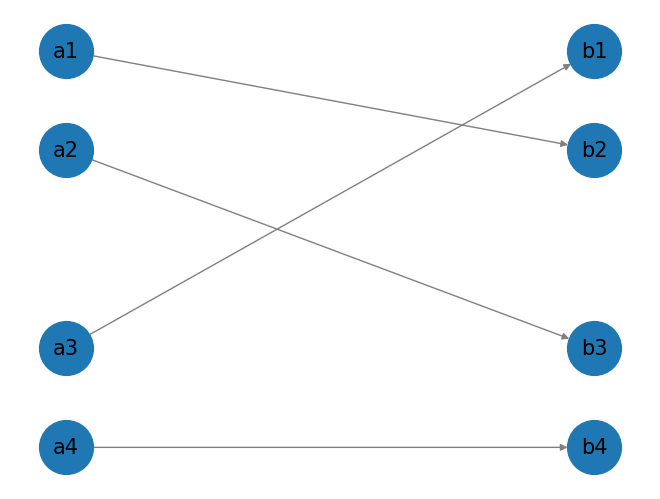

In [19]:
# Visualization of the perfect matching
DG3_copy = DG3.copy()
DG3_copy.remove_edges_from([('a1','b1'), ('a2', 'b2'), ('a3', 'b4'), ('a4','b1'), ('a4', 'b2')])

'''nx.draw_networkx_edge_labels(DG3,pos,
    edge_labels={
        ('a1','b2'):1,
        ('a2','b3'):1,
        ('a3','b1'):1,
        ('a4','b4'):1},
    font_color='red',
    font_size=13)'''

nx.draw(DG3_copy, pos, with_labels=True, node_size=1500, font_size=15, edge_color='gray')

**(b)** Now, assume that there are multiple portions of every food, and the distribution of the
portions is (2,3,2,2). Each person can take an arbitrary number of different foods. Exploit
the analogy with max-flow problems to establish how many portions of food can be assigned
in total.

In [20]:
DG5 = DG4.copy()

In [21]:
# Define the number of portions available for each food item
food_portions = {
    'b1': 2,
    'b2': 3,
    'b3': 2,
    'b4': 2
}

# Define the number if requirements per person
# "Each person can take an arbitrary number of different foods"
person_requirements = {
    'a1': float('inf'),
    'a2': float('inf'),
    'a3': float('inf'), 
    'a4': float('inf')  
}

# Update the graph with the new capacities for each food node to the sink
# Clear existing edges to sink and add the new capacity based on food portions
for food, portions in food_portions.items():
    DG5.remove_edge(food, 'd') 
    DG5.add_edge(food, 'd', capacity=portions)
    
for person, requirement in person_requirements.items():
    DG5.remove_edge('o', person)
    DG5.add_edge('o', person, capacity=requirement)
    
# Calculate maximum flow with the updated capacities
flow_value_with_portions, flow_dict_with_portions = nx.maximum_flow(DG5, 'o', 'd')

flow_value_with_portions, flow_dict_with_portions

(8,
 {'a1': {'b1': 0, 'b2': 1},
  'b1': {'d': 2},
  'b2': {'d': 3},
  'a2': {'b2': 1, 'b3': 1},
  'b3': {'d': 1},
  'a3': {'b1': 1, 'b4': 1},
  'b4': {'d': 2},
  'a4': {'b1': 1, 'b2': 1, 'b4': 1},
  'o': {'a1': 1, 'a2': 2, 'a3': 2, 'a4': 3},
  'd': {}})

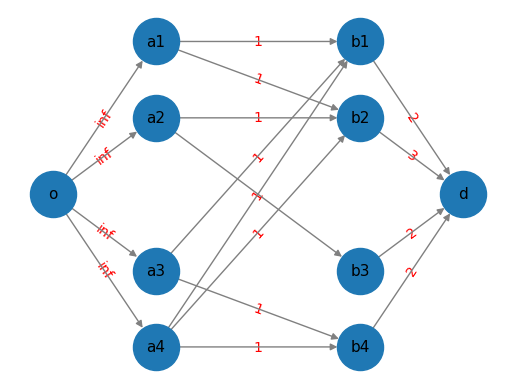

In [22]:
# Draw the updated network
nx.draw_networkx_edge_labels(DG5,pos,
    edge_labels={
        ('o', 'a1'):float('inf'),
        ('o', 'a2'):float('inf'),
        ('o', 'a3'):float('inf'),
        ('o', 'a4'):float('inf'),
        ('a1','b1'):1,
        ('a1','b2'):1,
        ('a2','b2'):1,
        ('a2','b3'):1,
        ('a3','b1'):1,
        ('a3','b4'):1,
        ('a4','b1'):1,
        ('a4','b2'):1,
        ('a4','b4'):1,
        ('b1', 'd'):2,
        ('b2', 'd'):3,
        ('b3', 'd'):2,
        ('b4', 'd'):2},
    font_color='red',
    font_size=10)

nx.draw(DG5, pos, with_labels=True, node_size=1100, font_size=11, edge_color='gray')

**(c)** Now, assume that $a1$ wants 3 portions of food, $a_i$ (for every $i \neq 1$) want 2 portions of food,
every person can take multiple portions of the same food, and the distribution of the portions
is (2,3,2,2). Exploit the analogy with max-flow problems to establish how many portions of
food can be assigned in total

In [23]:
DG6 = DG5.copy()

In [24]:
# Define the new portion requirements for each person
person_requirements = {
    'a1': 3,
    'a2': 2,
    'a3': 2, 
    'a4': 2  
}

# Update the graph to reflect the new portion requirements for each person
# Clear existing edges from the source to each person and set the new capacities
for person, requirement in person_requirements.items():
    DG6.remove_edge('o', person)
    DG6.add_edge('o', person, capacity=requirement)

# Calculate maximum flow with the updated capacities
flow_value_with_person_requirements, flow_dict_with_person_requirements = nx.maximum_flow(DG6, 'o', 'd')

flow_value_with_person_requirements, flow_dict_with_person_requirements

(8,
 {'a1': {'b1': 1, 'b2': 1},
  'b1': {'d': 2},
  'b2': {'d': 3},
  'a2': {'b2': 1, 'b3': 1},
  'b3': {'d': 1},
  'a3': {'b1': 1, 'b4': 1},
  'b4': {'d': 2},
  'a4': {'b1': 0, 'b2': 1, 'b4': 1},
  'o': {'a1': 2, 'a2': 2, 'a3': 2, 'a4': 2},
  'd': {}})

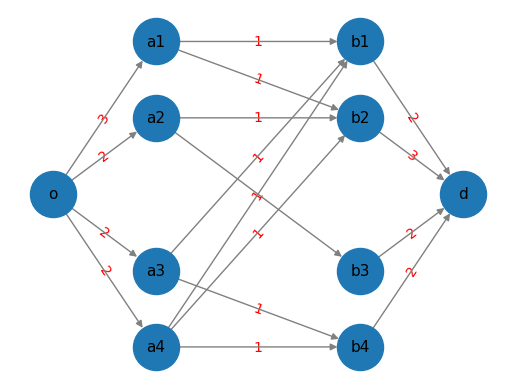

In [25]:
# draw the updated network
nx.draw_networkx_edge_labels(DG5,pos,
    edge_labels={
        ('o', 'a1'):3,
        ('o', 'a2'):2,
        ('o', 'a3'):2,
        ('o', 'a4'):2,
        ('a1','b1'):1,
        ('a1','b2'):1,
        ('a2','b2'):1,
        ('a2','b3'):1,
        ('a3','b1'):1,
        ('a3','b4'):1,
        ('a4','b1'):1,
        ('a4','b2'):1,
        ('a4','b4'):1,
        ('b1', 'd'):2,
        ('b2', 'd'):3,
        ('b3', 'd'):2,
        ('b4', 'd'):2},
    font_color='red',
    font_size=10)

nx.draw(DG5, pos, with_labels=True, node_size=1100, font_size=11, edge_color='gray')

## Exercise 3

We are given the highway network in Los Angeles, see Figure 2. To simplify the
problem, an approximate highway map is given in Figure 3, covering part of the real highway
network. The node-link incidence matrix *B*, for this traffic network is given in the file *traffic.mat*.
The rows of *B* are associated with the nodes of the network and the columns of *B* with the links.
The *i*-th column of *B* has 1 in the row corresponding to the tail node of link $e_i$ and (−1) in the row
corresponding to the head node of link $e_i$. Each node represents an intersection between highways
(and some of the area around).

Each link $e_i \in \{e1,...,e28\}$, has a maximum flow capacity $c_{e_i}$. The capacities are given as
a vector $c_e$ in the file *capacities.mat*. Furthermore, each link has a minimum travelling time $l_{e_i}$ ,
which the drivers experience when the road is empty. In the same manner as for the capacities,
the minimum travelling times are given as a vector $l_e$ in the file *traveltime.mat*. These values are simply retrieved by dividing the length of the highway segment with the assumed speed limit 60
miles/hour. For each link, we introduce the delay function
$$\tau_e(f_e)=\frac{l_e}{1-f_e/c_e}, 0\le f_e \lt c_e$$
For $f_e \ge c_e$ the value of $\tau_e(f_e)$ is considered as $+\infin$

If you use Python to solve the Exercise, you can load the .mat files by the following code:
```
f = scipy.io.loadmat(’flow.mat’)['flow'].reshape(28,)
C = scipy.io.loadmat(’capacities.mat’)['capacities'].reshape(28,)
B = scipy.io.loadmat(’traffic.mat’)['traffic']
l = scipy.io.loadmat(’traveltime.mat’)['traveltime'].reshape(28,)
```

**(a)** Find the shortest path between node 1 and 17. This is equivalent to the fastest path (path
with shortest traveling time) in an empty network.

In [26]:
import scipy

# Load the capacities, traffic incidence matrix, and travel times from the respective .mat files
C = scipy.io.loadmat('capacities.mat')['capacities'].reshape(28,)
B = scipy.io.loadmat('traffic.mat')['traffic']
l = scipy.io.loadmat('traveltime.mat')['traveltime'].reshape(28,)

# Define the set of node names and the number of nodes
node_names = range(1,18)
num_nodes = len(node_names)

# Create a directed graph
DG7 = nx.DiGraph()

# Iterate through each edge in the incidence matrix
num_edges = B.shape[1]
for j in range(num_edges):
    tail = None
    head = None
    for i in range(num_nodes):
        if B[i, j] == 1:
            tail = node_names[i]  # Find tail node
        elif B[i, j] == -1:
            head = node_names[i]  # Find head node
    
    # Add the edge to the graph if both tail and head are found
    if tail is not None and head is not None:
        # Add edge with its capacity and travel time as attributes
        # I apply casting in order to prevent overflow in point (b)
        DG7.add_edge(tail, head, capacity=int(C[j]), travel_time=float(l[j]))

# Print the edges of the directed graph with attributes
print("Directed Graph Edges with Capacities and Travel Times:")
for u, v, data in DG7.edges(data=True):
    print(f"{u} -> {v}, Capacity: {data['capacity']}, Travel Time: {data['travel_time']}")

Directed Graph Edges with Capacities and Travel Times:
1 -> 2, Capacity: 8741, Travel Time: 0.1621
1 -> 6, Capacity: 13707, Travel Time: 0.12983
2 -> 3, Capacity: 9864, Travel Time: 0.0554
2 -> 7, Capacity: 11102, Travel Time: 0.10517
3 -> 4, Capacity: 13350, Travel Time: 0.129
3 -> 8, Capacity: 8899, Travel Time: 0.10667
3 -> 9, Capacity: 8970, Travel Time: 0.10483
4 -> 5, Capacity: 10926, Travel Time: 0.18667
4 -> 9, Capacity: 9753, Travel Time: 0.11233
5 -> 14, Capacity: 9719, Travel Time: 0.1805
6 -> 7, Capacity: 6960, Travel Time: 0.078333
6 -> 10, Capacity: 9083, Travel Time: 0.1215
7 -> 8, Capacity: 7422, Travel Time: 0.094
7 -> 10, Capacity: 11216, Travel Time: 0.056667
8 -> 9, Capacity: 6678, Travel Time: 0.057333
8 -> 11, Capacity: 10947, Travel Time: 0.032667
9 -> 13, Capacity: 6297, Travel Time: 0.14167
9 -> 12, Capacity: 10019, Travel Time: 0.035
13 -> 14, Capacity: 6677, Travel Time: 0.078333
13 -> 17, Capacity: 10355, Travel Time: 0.095833
14 -> 17, Capacity: 9067, Trave

In [27]:
# Calculate the shortest path from node 1 to node 17 based on minimum travel time
shortest_path = nx.shortest_path(DG7, source=1, target=17, weight='travel_time')
shortest_path_length = nx.shortest_path_length(DG7, source=1, target=17, weight='travel_time')

print(shortest_path, '\n', shortest_path_length)

[1, 2, 3, 9, 13, 17] 
 0.559833


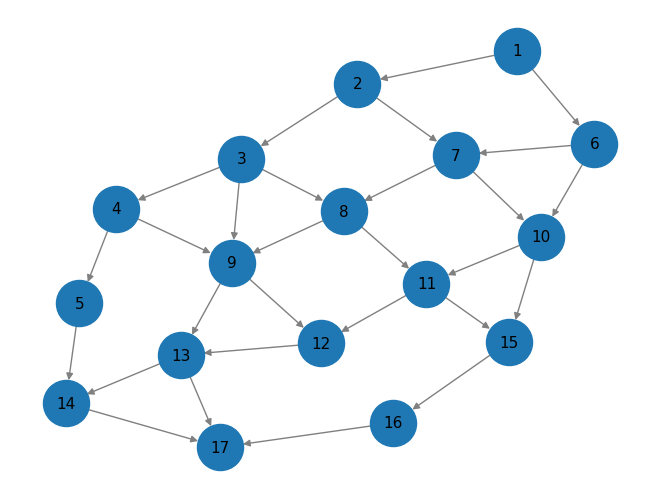

In [28]:
# Visualize the directed graph
nx.draw_kamada_kawai(DG7, with_labels=True, node_size=1100, font_size=11, edge_color='gray')

**(b)** Find the maximum flow between node 1 and 17.

In [29]:
#Calculate the maximum flow from node 1 (source) to node 17 (sink)
flow_value, flow_dict = nx.maximum_flow(DG7, 1, 17)

flow_value, flow_dict

(22448,
 {1: {2: 8741, 6: 13707},
  2: {3: 8741, 7: 0},
  3: {4: 0, 8: 0, 9: 8741},
  4: {5: 0, 9: 0},
  5: {14: 0},
  6: {7: 4624, 10: 9083},
  7: {8: 4624, 10: 0},
  8: {9: 4624, 11: 0},
  9: {13: 6297, 12: 7068},
  13: {14: 3835, 17: 10355},
  14: {17: 3835},
  10: {11: 825, 15: 8258},
  11: {12: 825, 15: 0},
  15: {16: 8258},
  12: {13: 7893},
  17: {},
  16: {17: 8258}})

**(c)** Given the flow vector in *flow.mat*, compute the vector $\nu$ satisfying $Bf = \nu$.

In [30]:
# Load the flow vector 'f' from the 'flow.mat' file
f = scipy.io.loadmat('flow.mat')['flow'].reshape(-1) 

# Compute the exogenous flow vector ν using the matrix equation Bf = ν
nu = B @ f
print("Vector ν satisfying Bf = ν:\n", nu)

Vector ν satisfying Bf = ν:
 [ 16282   9094  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]


In the following, we assume that the exogenous inflow is zero in all the nodes except for node 1,
for which $\nu_1$ has the same value computed in the point **(c)**, and node 17, for which $\nu_{17} = −\nu_1$.

**(d)** Find the social optimum $f_∗$ with respect to the delays on the different links $\tau_e(f_e)$. For this,
minimize the cost function:
$$\sum_{e \in \Epsilon} f_e \tau_e (f_e) = \sum_{e\in\Epsilon}\frac{f_el_e}{1-f_e/c_e} = \sum_{e\in\Epsilon}(\frac{l_ec_e}{1-f_e/c_e}-l_ec_e)$$
subject to the flow constraints.

**Hint**: use the Tutorial (https://www.cvxpy.org/tutorial/functions/index.html) to learn how
to code functions in cvxpy.

In [31]:
! pip install cvxpy


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [32]:
import cvxpy as cp

In [33]:
# Define the flow variables for each edge (a variable for each edge)
f = cp.Variable(num_edges)

# Set the exogenous inflow vector nu, a vector that represents the inflow/outflow at each node
nu[1:] = 0    
nu[-1] = -nu[0]

# Define the cost function to minimize
cost_fn = cp.sum(cp.multiply(cp.multiply(l, C), cp.inv_pos(1 - cp.multiply(f, cp.inv_pos(C)))) - cp.multiply(l, C))

epsilon = 1e-6
# Define the constraints:
constraints = [
    B @ f == nu,  # Flow conservation
    f >= 0,        # Non-negativity constraint
    f <= C - epsilon         # Capacity constraint
]

# Create and solve the optimization problem
problem = cp.Problem(cp.Minimize(cost_fn), constraints)
problem.solve()  # Solve the optimization problem

# Extract the optimal flow and cost from the solution
opt_flow = f.value
opt_cost = problem.value

# Print the results
print("\nSocial optimal flow f^*:", opt_flow)  # Optimal flow distribution across edges
print("\nOptimal cost:", opt_cost)  # Minimum total cost achieved


Social optimal flow f^*: [6.37458648e+03 5.66544280e+03 2.90469700e+03 2.90469516e+03
 9.90741352e+03 4.52798777e+03 2.95050425e+03 2.48738468e+03
 3.01825442e+03 7.09143681e+02 8.94417065e-03 2.76073685e+03
 1.84264989e-03 2.90469516e+03 5.37942575e+03 2.76619021e+03
 4.89986274e+03 2.28662721e+03 4.63128516e+02 2.22986896e+03
 3.22931627e+03 5.45918523e+03 2.30731755e+03 2.45325296e-03
 6.17012210e+03 5.21201270e+03 4.89986520e+03 4.89986520e+03]

Optimal cost: 23997.160893544053


**(e)** Find the Wardrop equilibrium $f^{(0)}$. For this, use the cost function:
$$\sum_{e \in \Epsilon} \int_{0}^{f_e}{\tau_e(s)ds} $$

In [34]:
# Variable for flow in Wardrop equilibrium (one variable per edge)
f = cp.Variable(num_edges)

# Define the cost function for Wardrop equilibrium:
cost_fn = cp.sum(-cp.multiply(cp.multiply(C, l), cp.log(1 - cp.multiply(f, cp.inv_pos(C)))))

epsilon = 1e-6
# Define the constraints for the Wardrop equilibrium
constraints = [
    B @ f == nu,  # Flow conservation
    f >= 0,       # Non-negativity constraint
    f <= C - epsilon       # Capacity constraint
]

# Create and solve the optimization problem for Wardrop equilibrium
problem = cp.Problem(cp.Minimize(cost_fn), constraints)
problem.solve()

# Retrieve the optimal flow values for Wardrop equilibrium
opt_flow_wardrop = f.value
wardrop_cost = problem.value

# Print the results
print("\nWardrop equilibrium flow f^(0):", opt_flow_wardrop)  # Optimal flow distribution in the Wardrop equilibrium
print("\nWardrop cost:", wardrop_cost)  # Minimum total cost (delay) achieved under the Wardrop equilibrium


Wardrop equilibrium flow f^(0): [6.34959730e+03 6.17823284e+03 2.03774126e+03 2.03774125e+03
 9.93240270e+03 4.56732611e+03 2.73814573e+03 2.14413461e+03
 3.27078036e+03 1.71364458e+02 6.92140356e+01 4.07127754e+03
 1.12295812e-05 2.03774125e+03 5.36507659e+03 2.20291472e+03
 5.16270671e+03 2.00054484e+03 6.63225153e+02 2.94463180e+03
 2.86613985e+03 5.81077165e+03 2.43667668e+03 1.77392499e-05
 6.64487534e+03 4.47441793e+03 5.16270673e+03 5.16270673e+03]

Wardrop cost: 14927.705634976886


The Price of Anarchy is:
$$
PoA = \frac{\sum_{e}f_e^{(0)}\tau_e(f_e^{(0)})}{\sum_{e}f_e^{*}\tau_e(f_e^{*})}
$$

In [35]:
wardrop_cost = cp.sum(cp.multiply(cp.multiply(l, C), cp.inv_pos(1 - cp.multiply(opt_flow_wardrop, cp.inv_pos(C)))) - cp.multiply(l, C))

# Compute the price of anarchy (PoA) comparing the social optimum (from point d) and Wardrop equilibrium cost
PoA_0 = wardrop_cost / opt_cost
print("PoA:",PoA_0.value)

PoA: 1.0143390607162983


**(f)** Introduce tolls, such that the toll on link $e$ is $\omega_e = \psi^′_e(f^*_e ) −\tau_e(f^*_e )$. For the considered $\psi_e(f_e)$, $\omega_e = f^*_e \tau^′_e(f^*_e )$, where $f^*_e$ is the flow at the system optimum. Now the delay on link $e$ is given by $\tau_e(f_e) + \omega_e$. compute the new Wardrop equilibrium $f^{(\omega)}$. What do you observe?

In [36]:
# Define the first derivative of tau
def tau_prime(f):
    return l*C / (C - f)**2

# Variable for flow in Wardrop equilibrium with tolls (one variable per edge)
f = cp.Variable(num_edges)

# Define the toll term omega_e based on the optimal flow f^*
toll_term = cp.multiply(opt_flow, tau_prime(opt_flow))

# Define the cost function
cost_fn = cp.sum(-cp.multiply(cp.multiply(C, l), cp.log(1 - cp.multiply(f, cp.inv_pos(C)))) + cp.multiply(toll_term,f))

epsilon = 1e-6
# Define the constraints for the Wardrop equilibrium with tolls
constraints = [
    B @ f == nu,  # Flow conservation: inflow = outflow for each node
    f >= 0,       # Non-negativity: flow cannot be negative
    f <= C - epsilon         # Capacity: flow cannot exceed the capacity of each edge
]

# Create and solve the optimization problem for the Wardrop equilibrium with tolls
problem = cp.Problem(cp.Minimize(cost_fn), constraints)
problem.solve()  # Solve the problem

# Retrieve the optimal flow values with tolls
opt_flow_wardrop_toll = f.value
wardrop_toll_cost = problem.value

# Print the results
print("\nWardrop equilibrium flow with tolls f^(omega):", opt_flow_wardrop_toll)  # Optimal flow distribution with tolls
print("\nWardrop with tolls cost:", wardrop_toll_cost)  # Optimal total cost with tolls


Wardrop equilibrium flow with tolls f^(omega): [6.37316720e+03 5.66547556e+03 2.90445355e+03 2.90445351e+03
 9.90883278e+03 4.52758914e+03 2.95037287e+03 2.48721347e+03
 3.01847624e+03 7.07691635e+02 1.33375264e-04 2.76102188e+03
 3.99576096e-05 2.90445351e+03 5.38124364e+03 2.76631039e+03
 4.89984115e+03 2.28490790e+03 4.63159538e+02 2.22975915e+03
 3.22946987e+03 5.45922902e+03 2.30762419e+03 5.72647907e-05
 6.17008107e+03 5.21207770e+03 4.89984121e+03 4.89984121e+03]

Wardrop with tolls cost: 53638.46396053358


In [37]:
wardrop_cost = cp.sum(cp.multiply(cp.multiply(l, C), cp.inv_pos(1 - cp.multiply(opt_flow_wardrop_toll, cp.inv_pos(C)))) - cp.multiply(l, C))

# Compute the price of anarchy (PoA) comparing the social optimum (from point d) and Wardrop equilibrium with tolls cost 
PoA_0 = wardrop_cost / opt_cost
print("PoA:",PoA_0.value)

PoA: 1.0000000727894767


**(g)** Instead of the total travel time, let the cost for the system be the total additional travel time compared to the total travel time in free flow, given by
$$\psi_e(f_e) = f_e(\tau_e(f_e) −l_e)$$
subject to the flow constraints. Compute the system optimum $f^*$ for the costs above. Construct a toll vector $\omega^*$ such that the Wardrop equilibrium $f^{(\omega^*)}$ coincides with $f^*$. Compute
the new Wardrop equilibrium with the constructed tolls $f^{(\omega^*)}$ to verify your result.

In [38]:
# Variable for flow in Wardrop equilibrium with tolls (one variable per edge)
f = cp.Variable(num_edges)

# Define the cost function
cost_fn = cp.sum(cp.multiply(cp.multiply(l, C), cp.inv_pos(1 - cp.multiply(f, cp.inv_pos(C)))) - cp.multiply(l, C) - cp.multiply(f,l))

epsilon = 1e-6
# Constraints (flow conservation, non-negativity, and capacity limits)
constraints = [
    B @ f == nu,  # Flow conservation
    f >= 0,  # Non-negativity constraint
    f <= C - epsilon  # Capacity constraint
]

# Create and solve the optimization problem
problem = cp.Problem(cp.Minimize(cost_fn), constraints)
problem.solve()  # Solve the problem

# Extract the optimal flow and cost from the solution
opt_flow = f.value
opt_cost = problem.value

# Print the results
print("\nSocial optimal flow f^*:", opt_flow)  # Optimal flow distribution across edges
print("\nOptimal cost:", opt_cost)  # Minimum total cost achieved


Social optimal flow f^*: [6.39406017e+03 5.42061383e+03 3.24368805e+03 3.24367159e+03
 9.88793983e+03 4.53049520e+03 3.05171489e+03 2.61218469e+03
 2.89543797e+03 9.73446342e+02 1.49529419e-02 2.17691083e+03
 1.64562995e-02 3.24367159e+03 5.35744463e+03 2.96982990e+03
 4.83984139e+03 2.45222666e+03 4.39545145e+02 1.89367401e+03
 3.40936743e+03 5.30304143e+03 2.14024211e+03 7.62006979e-03
 6.05823729e+03 5.38391370e+03 4.83984901e+03 4.83984901e+03]

Optimal cost: 13550.216396247506


In [39]:
# Variable for flow in Wardrop equilibrium with tolls (one variable per edge)
f = cp.Variable(num_edges)

# Define the toll term omega_e based on the optimal flow f^*
toll_term = cp.multiply(opt_flow, tau_prime(opt_flow)) - l

# Define the cost function
cost_fn = cp.sum(-cp.multiply(cp.multiply(C, l), cp.log(1 - cp.multiply(f, cp.inv_pos(C)))) + cp.multiply(toll_term,f))

epsilon = 1e-6
constraints = [
    B @ f == nu,  # Flow conservation
    f >= 0,  # Non-negativity constraint
    f <= C - epsilon,  # Capacity constraint
    f == opt_flow
]

# Create and solve the optimization problem for the Wardrop equilibrium with tolls
problem = cp.Problem(cp.Minimize(cost_fn), constraints)
problem.solve()  # Solve the problem

# Retrieve the optimal flow values with tolls
opt_flow_wardrop_toll = f.value
wardrop_toll_cost = problem.value

# Print the results
print("\nWardrop equilibrium flow with tolls f^(omega_star):", opt_flow_wardrop_toll)  # Optimal flow distribution with tolls
print("\nWardrop with tolls cost:", wardrop_toll_cost)  # Optimal total cost with tolls


Wardrop equilibrium flow with tolls f^(omega_star): [6.39406017e+03 5.42061382e+03 3.24368805e+03 3.24367159e+03
 9.88793983e+03 4.53049520e+03 3.05171488e+03 2.61218469e+03
 2.89543797e+03 9.73446342e+02 1.49529419e-02 2.17691083e+03
 1.64562995e-02 3.24367159e+03 5.35744463e+03 2.96982990e+03
 4.83984138e+03 2.45222666e+03 4.39545145e+02 1.89367401e+03
 3.40936742e+03 5.30304143e+03 2.14024211e+03 7.62006978e-03
 6.05823729e+03 5.38391370e+03 4.83984900e+03 4.83984900e+03]

Wardrop with tolls cost: 42955.00282271799


In [40]:
# Check if the flow in the Wardrop equilibrium with tolls matches the optimal flow within a small tolerance.
np.abs(opt_flow_wardrop_toll - opt_flow) <= 1e-5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [41]:
wardrop_cost = cp.sum(cp.multiply(cp.multiply(l, C), cp.inv_pos(1 - cp.multiply(opt_flow_wardrop_toll, cp.inv_pos(C)))) - cp.multiply(l, C) - cp.multiply(f,l))


# Compute the price of anarchy (PoA) comparing the social optimum and Wardrop equilibrium cost
PoA_0 = wardrop_cost / opt_cost
print("PoA:",PoA_0.value)

PoA: 0.9999999983198757
